<img src="http://drive.google.com/uc?export=view&id=1tpOCamr9aWz817atPnyXus8w5gJ3mIts" width=500px>

# Part 1:- Probability Distributions

## Problem Statement 1:
Investment Advisors agree that near retirees, defined as people aged 55 to 65, should have balanced portfolios. Most advisors suggest that the near –retirees have no more than 50% of their investments in stocks. However, during the huge decline in the stock market in 2008, 22% of near retirees had 90% or more of their investments in stocks.
Suppose you have a random sample of 10 people who have labeled as near retirees in 2008.

### Question 1.1: Define the random variable and the corresponding probability distribution that this random variable follows.

In [91]:
from scipy import stats

n=10
p=0.22


#This follows the binomial distribution


### Question 1.2: What is the probability that during 2008 zero near retirees had 90% or more of their investments in stocks?

In [92]:

k = 0

ans = stats.binom.pmf(k, n, p)

print("The probability zero near retirees had 90% or more of their investments in stocks is ", ans)



The probability zero near retirees had 90% or more of their investments in stocks is  0.083357758312362


### Question 1.3: What is the probability that during 2008 exactly one near retiree had 90% or more of his investments in stocks?

In [93]:
k = 1

ans1 = stats.binom.pmf(k,n,p)

print("The probability exactly one near retiree had 90% or more of his investments in stocks is", ans1)


The probability exactly one near retiree had 90% or more of his investments in stocks is 0.23511162600922644


### Question 1.4: What is the probability that during 2008 two or fewer near retirees had 90% or more of their investment in stocks?


In [78]:
k = 0,1,2

##ans2 = [(stats.binom.pmf(0, 10, 0.22) + stats.binom.pmf(1, 10, 0.22) + stats.binom.pmf(2, 10, 0.22))]

ans2 = stats.binom.cdf(2,n,p)
    
print("The probability two or fewer near retirees had 90% or more of their investment in stocks ", ans2)   

    

The probability two or fewer near retirees had 90% or more of their investment in stocks  0.6168802942563754


## Problem Statement 2
Assume that number of network errors experienced in a day on a local area network (LAN) is distributed as a Poisson random variable. The mean number of network errors experienced in a day is 2.4.

### Question 2.1: Define the random variable and the corresponding probability distribution that this random variable follows.

In [81]:
labda = 2.4

##This is a poisson distribution


### Question 2.2: What is the probability that in any given day zero network errors will occur?

In [85]:
n =0

ans22 = stats.poisson.pmf(n,labda)

print("The probability that in any given day zero network errors will occur is ", ans22)


The probability that in any given day zero network errors will occur is  0.09071795328941251


### Question 2.3: What is the probability that in any given day exactly one network error will occur?

In [86]:
n =1

ans23 = stats.poisson.pmf(n,labda)

print("The probability that in any given day exactly one network error will occur is ", ans23)



The probability that in any given day exactly one network error will occur is  0.21772308789459002


### Question 2.4: What is the probability that in any given day two or more network errors will occur?

In [96]:

ans24 = (1 - (stats.poisson.pmf(0, labda) + stats.poisson.pmf(1, labda)))

print("The probability that in any given day two or more network errors will occur ", ans24)



The probability that in any given day two or more network errors will occur  0.6915589588159975


# Part 2:- Health Insurance Cost Prediction 

### Data Set - 

Domain: Finance, Insurance

Data: https://www.kaggle.com/teertha/ushealthinsurancedataset

#### Features

1. age
2. sex
3. bmi
4. children
5. smoker
6. region
7. charges

 - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - 

###Objective-
To predict the individual's health cost based on individual's above mentioned features

## Steps to perform:

#### 1. Import Libraries
#### 2. Import Dataset and exploration
#### 3. Basic EDA
#### 4. Statistical analysis and Hypothesis testing

- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -


- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -


## 1. Import all the necessary libraries

In [3]:
import pandas as pd
%matplotlib inline
from matplotlib import pyplot as plt
import seaborn as sns
sns.set() #setting the default seaborn style for our plots
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler
##from sklearn.model_selection import train_test_split
import copy

## 2. Import Dataset and exploration

In [97]:
file = '/Users/Shiva/Desktop/python/AllLabs/insurance.csv'
df = pd.read_csv(file)

#### Check the first and last 5 samples of the dataframe and get familiar with the data

In [99]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [98]:
df.tail()

,age,sex,bmi,children,smoker,region,charges
1333,50,male,30.97,3,no,northwest,10600.5483
1334,18,female,31.92,0,no,northeast,2205.9808
1335,18,female,36.85,0,no,southeast,1629.8335
1336,21,female,25.80,0,no,southwest,2007.9450
1337,61,female,29.07,0,yes,northwest,29141.3603


## 3. Basic EDA

#### Find the shape of the data and the data type of individual columns

In [104]:
print(df.shape)
print(df.info())

(1338, 7)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB
None


#### Check the presence of missing values

In [105]:
df.isna().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

#### Check the descriptive stats of numerical columns

In [106]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [ ]:
#findings:
## 1. Age looks true representation of population at the range between 18-24
## 2. Age and BMI are uniformally distributed
## 3. More than 50% people are overweight(because the 50% of BMI is above 30)
## 4. Charges column are highly skewed
## 3. 75% of people have 2 or less children

#### Find the distribution of numerical columns and the asssociated skeweness.

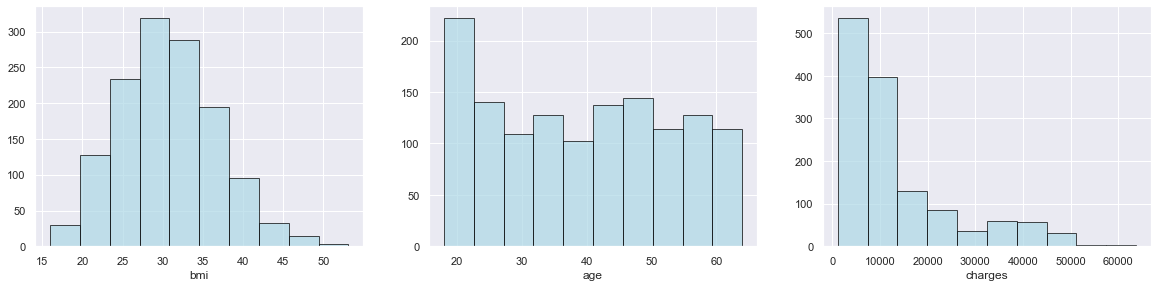

In [23]:
#plot desc of numerical columns age, bmi and charges 

#Plots to see the distribution of the continuous features individually

plt.figure(figsize= (20,15))
plt.subplot(3,3,1)
plt.hist(df.bmi, color='lightblue', edgecolor = 'black', alpha = 0.7)
plt.xlabel('bmi')

plt.subplot(3,3,2)
plt.hist(df.age, color='lightblue', edgecolor = 'black', alpha = 0.7)
plt.xlabel('age')

plt.subplot(3,3,3)
plt.hist(df.charges, color='lightblue', edgecolor = 'black', alpha = 0.7)
plt.xlabel('charges')

plt.show()


In [ ]:
## BMI is quite normally distributed
## Age is uniformly distributed
## Charges is highly skewed

In [25]:
df[['age','charges','bmi']].skew()

age        0.055673
charges    1.515880
bmi        0.284047
dtype: float64

#### Check the presence of outlier values

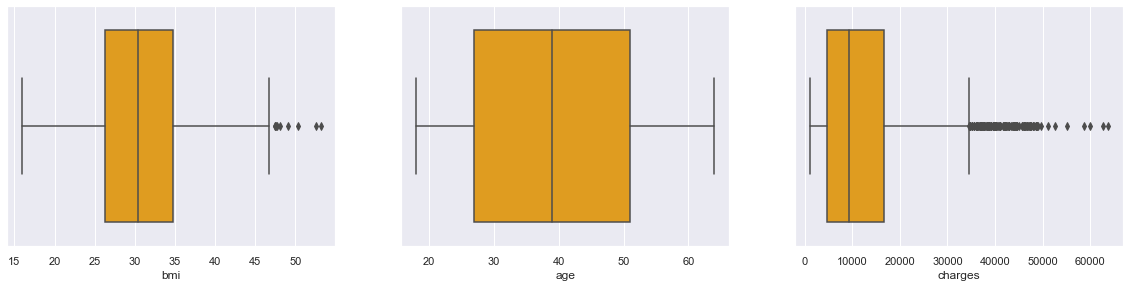

In [115]:
plt.figure(figsize= (20,15))
plt.subplot(3,3,1)
sns.boxplot(x=df.bmi, color='orange')

plt.subplot(3,3,2)
sns.boxplot(x=df.age, color='orange')

plt.subplot(3,3,3)
sns.boxplot(x=df.charges, color='orange')

plt.show()

In [ ]:
## BMI -- few outliers above 47
## age -- age has no outliers 
## charges -- lots of outliers above 35000

#### Check the distribution of categorical columns

/Users/Shiva/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='sex', ylabel='count'>

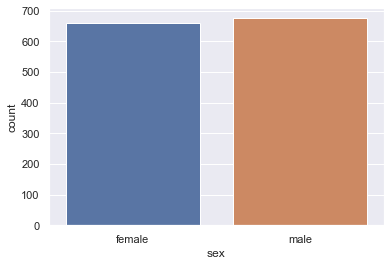

In [31]:
## categorical column plotting is made best with SNS not with other plot libs 
sns.countplot(df['sex'])

/Users/Shiva/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='smoker', ylabel='count'>

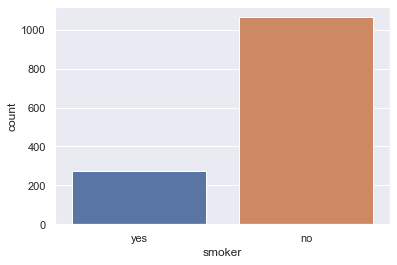

In [32]:
sns.countplot(df['smoker'])

/Users/Shiva/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='children', ylabel='count'>

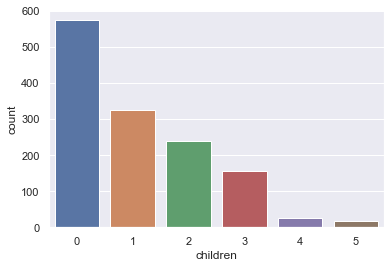

In [33]:
sns.countplot(df['children'])

/Users/Shiva/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='region', ylabel='count'>

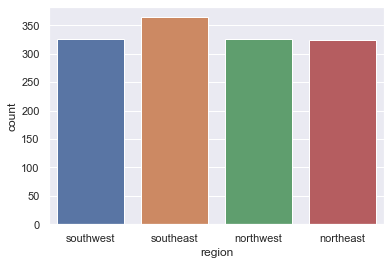

In [34]:
sns.countplot(df['region'])

In [ ]:
##Observations
#1. Gender is equally distributed
#2. Less than 2 yrs old children are more
#3. region is equally distributed
#4. There are more non smokers  

#### Check the Bi-variate distribution of every possible attribute pair

In [119]:

df_encoded = copy.deepcopy(df)
le = LabelEncoder()
df_encoded[['sex', 'smoker', 'region']] = df_encoded[['sex', 'smoker', 'region']].apply(le.fit_transform)

df_encoded.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520


In [120]:
df_encoded.corr()


,age,sex,bmi,children,smoker,region,charges
age,1.000000,-0.020856,0.109272,0.042469,-0.025019,0.002127,0.299008
sex,-0.020856,1.000000,0.046371,0.017163,0.076185,0.004588,0.057292
bmi,0.109272,0.046371,1.000000,0.012759,0.003750,0.157566,0.198341
children,0.042469,0.017163,0.012759,1.000000,0.007673,0.016569,0.067998
smoker,-0.025019,0.076185,0.003750,0.007673,1.000000,-0.002181,0.787251
region,0.002127,0.004588,0.157566,0.016569,-0.002181,1.000000,-0.006208
charges,0.299008,0.057292,0.198341,0.067998,0.787251,-0.006208,1.000000


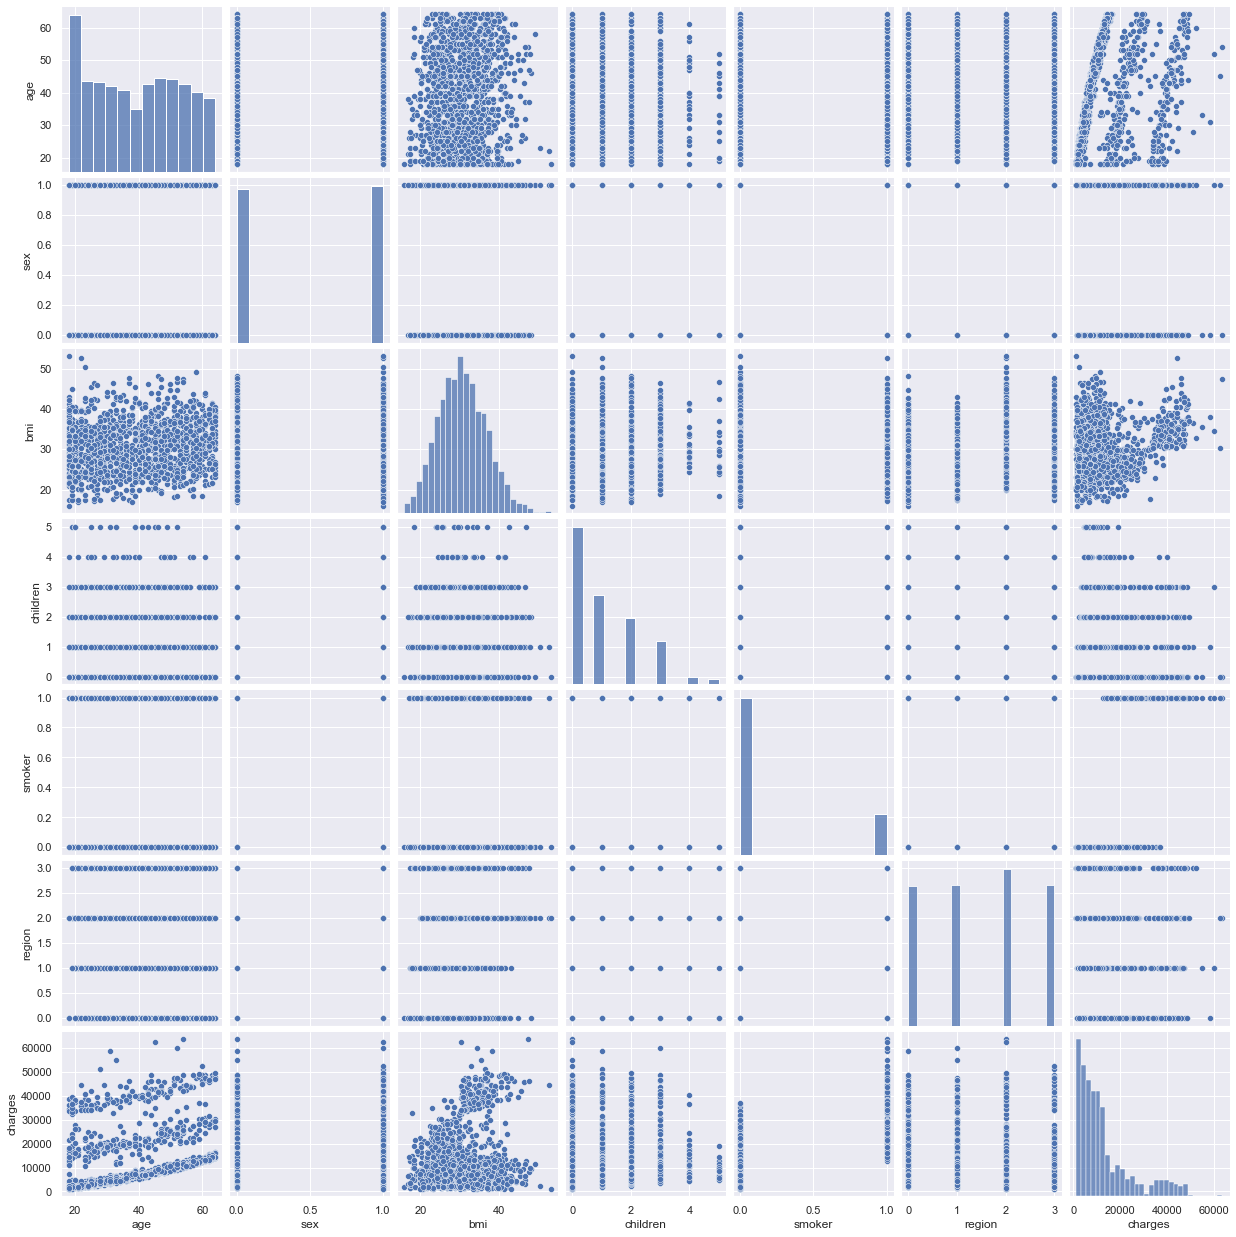

In [121]:
sns.pairplot(df_encoded)

## 4. Statistical analysis and Hypothesis testing
- Use appropriate hypothesis test for answering below questions

#### Check if the charges of people who smoke differ significantly from the people who don't?

/Users/Shiva/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


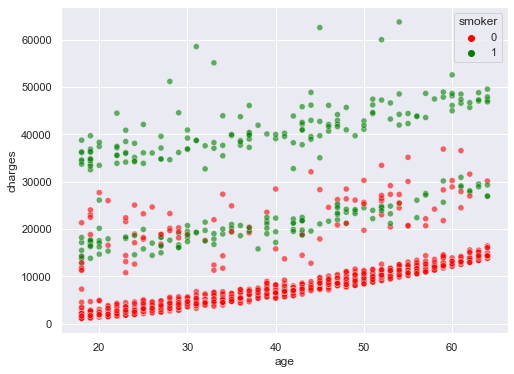

In [122]:
#Scatter plot to look for visual evidence of dependency between attributes smoker and charges accross different ages
plt.figure(figsize=(8,6))
sns.scatterplot(df_encoded.age, df_encoded.charges,hue=df_encoded.smoker,palette= ['red','green'] ,alpha=0.6)
plt.show()

In [45]:
## 2 sample t-test
## H0 = 'charges are same for both'
## H1 = 'charges differ for smokers and non-smokers'

Null_Hypothesis =  "Charges for smoker is same as non-smokers" 
Alternative_Hypothesis =  "Charges for smoker is different from that of a non-smoker"

smokerData = df[df['smoker']=='yes']['charges']

nonSmokerData = df[df['smoker']=='no']['charges']


t_statistics, p_value = stats.ttest_ind(smokerData, nonSmokerData)
print('P Value', p_value)


if p_value < 0.05 :
  print("Reject the Null hypothesis i.e. {} ". format(Alternative_Hypothesis))
else:
  print("Fail to reject the Null hypothesis i.e. {} ". format(Null_Hypothesis))


P Value 8.271435842177219e-283
Reject the Null hypothesis i.e. Charges for smoker is different from that of a non-smoker 


    #### Does bmi of males differ significantly from that of females?

/Users/Shiva/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


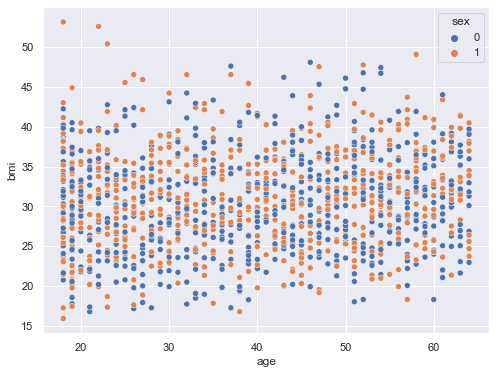

In [128]:
plt.figure(figsize=(8,6))
sns.scatterplot(df_encoded.age, df_encoded.bmi,hue=df_encoded['sex'])
plt.show()

#### Check if gender affects bmi

In [47]:
## 2 sample t-test
## H0 = 'BMI are same for both'
## H1 = 'BMI differ for male and female'

Null_Hypothesis =  "BMI are same for both" 
Alternative_Hypothesis =  "BMI differ for male and female"

maleData = df[df['sex']=='male']['bmi']

femaleData = df[df['sex']=='female']['bmi']


t_statistics, p_value = stats.ttest_ind(maleData, femaleData)
print('P Value', p_value)


if p_value < 0.05 :
  print("Reject the Null hypothesis i.e. {} ". format(Alternative_Hypothesis))
else:
  print("Fail to reject the Null hypothesis i.e. {} ". format(Null_Hypothesis))



P Value 0.08997637178984932
Fail to reject the Null hypothesis i.e. BMI are same for both 


#### Is the proportion of smokers significantly different in different genders?

/Users/Shiva/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='sex', ylabel='count'>

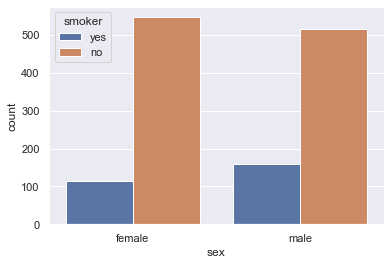

In [49]:
    sns.countplot(df['sex'], hue= df['smoker'])

In [131]:
data_crosstab = pd.crosstab(df_encoded['sex'], df_encoded['smoker'], margins = True)
data_crosstab

smoker,0,1,All
sex,,,
0,547,115,662
1,517,159,676
All,1064,274,1338


In [134]:
## Will 2 sample Chi square test for Hypothesis Testing 

Null_Hypotheis = "Proportion of Smokers is same in both the Genders"
Alternate_hypotheis ="Proportion of Smokers is differnt in both the Genders"

data_crosstab = pd.crosstab(df_encoded['sex'],df_encoded['smoker'],margins = False)

chi, p_value , dof, expected =  stats.chi2_contingency(data_crosstab)
print('P Value', p_value)

if p_value < 0.05 :
  print("Reject the Null hypothesis i.e. {} ". format(Alternate_hypotheis))
else:
  print("Fail to reject the Null hypothesis i.e. {} ". format(Null_Hypotheis))

P Value 0.006548143503580696
Reject the Null hypothesis i.e. Proportion of Smokers is differnt in both the Genders 


#### Check if smoking habits are different for people of different regions

/Users/Shiva/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='region', ylabel='count'>

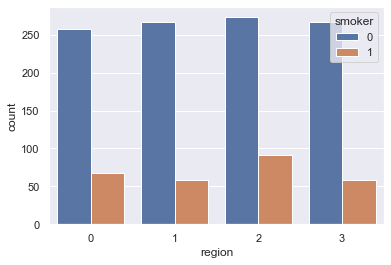

In [133]:
sns.countplot(df_encoded['region'], hue = df_encoded['smoker'])

In [132]:
Null_Hypotheis = "Proportion of Smokers is same in all the region"
Alternate_hypotheis ="Proportion of Smokers is differnt in all the region"


data_crosstab= pd.crosstab(df_encoded['region'], df_encoded['smoker'], margins = False)

chi, p_value, dof, expected = stats.chi2_contingency(data_crosstab)
print('P_value', p_value)

if p_value < 0.05 :
  print("Reject the Null hypothesis i.e. {} ". format(Alternate_hypotheis))
else:
  print("Fail to reject the Null hypothesis i.e. {} ". format(Null_Hypotheis))


P_value 0.06171954839170541
Fail to reject the Null hypothesis i.e. Proportion of Smokers is same in all the region 


#### Is the distribution of bmi across women with no children, one child and two children, the same ?

In [136]:
## Will do one-way ANOVA test for this

Null_Hypotheis = "No.of childern has no effect on BMI"
Alternate_hypotheis ="No. of children has effect on BMI"


dfFemale = df[df['sex']=='female']
noChildren = dfFemale[dfFemale['children'] == 0]['bmi']
oneChildren = dfFemale[dfFemale['children'] == 1]['bmi']
twoChildren = dfFemale[dfFemale['children'] == 2]['bmi']

f, p_value = stats.f_oneway(noChildren, oneChildren, twoChildren)
print('P_value', p_value)

if p_value < 0.05 :
  print("Reject the Null hypothesis i.e. {} ". format(Alternate_hypotheis))
else:
  print("Fail to reject the Null hypothesis i.e. {} ". format(Null_Hypotheis))



P_value 0.7158579926754841
Fail to reject the Null hypothesis i.e. No.of childern has no effect on BMI 
